<a href="https://colab.research.google.com/github/samipn/Pycaret/blob/main/06_association_rules_groceries_pycaret235.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Association Rules (Groceries) — PyCaret 2.3.5

# ✅ Enable GPU in Colab
*Runtime → Change runtime type → **T4 / L4 GPU** → Save.*  
Each notebook sets `use_gpu=True` in `setup()`. Models that support GPU (e.g., XGBoost, CatBoost) will leverage it automatically if available.

This notebook pins **pycaret==2.3.5** to use the `arules` module. Dataset: Groceries.

In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 6.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 72.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 7.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of umap-learn to det

In [1]:
import pandas as pd
import requests

# Public groceries dataset: one transaction per row with comma-separated items
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/groceries.csv"

# Read the raw text content of the file
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad status codes
data = response.text.splitlines()

# Convert to list-of-lists for transactional format
transactions = [line.split(',') for line in data]

# Create a pandas Series for display
transactions_series = pd.Series(transactions)
display(transactions_series.head())

,0
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese , meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."


In [4]:
!pip install mlxtend

In [5]:
from mlxtend.preprocessing import TransactionEncoder

# Convert the list of transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transactions_df = pd.DataFrame(te_ary, columns=te.columns_)

display(transactions_df.head())

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [6]:
from mlxtend.frequent_patterns import apriori

# Find frequent itemsets using the Apriori algorithm
# You can adjust the min_support parameter as needed
frequent_itemsets = apriori(transactions_df, min_support=0.01, use_colnames=True)

display(frequent_itemsets.head())

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)


In [7]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules
# You can adjust the metric and min_threshold parameters as needed
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

display(rules.head())

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,1.0,0.009574,1.292416,0.512224,0.087191,0.226255,0.238957
1,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,1.0,0.011668,1.332628,0.708251,0.120677,0.249603,0.245455
2,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,1.0,0.007845,1.251315,0.389597,0.074113,0.200841,0.244103
3,(berries),(other vegetables),0.033249,0.193493,0.010269,0.308869,1.596280,1.0,0.003836,1.166938,0.386391,0.047440,0.143056,0.180971
4,(berries),(whole milk),0.033249,0.255516,0.011795,0.354740,1.388328,1.0,0.003299,1.153774,0.289329,0.042584,0.133279,0.200450


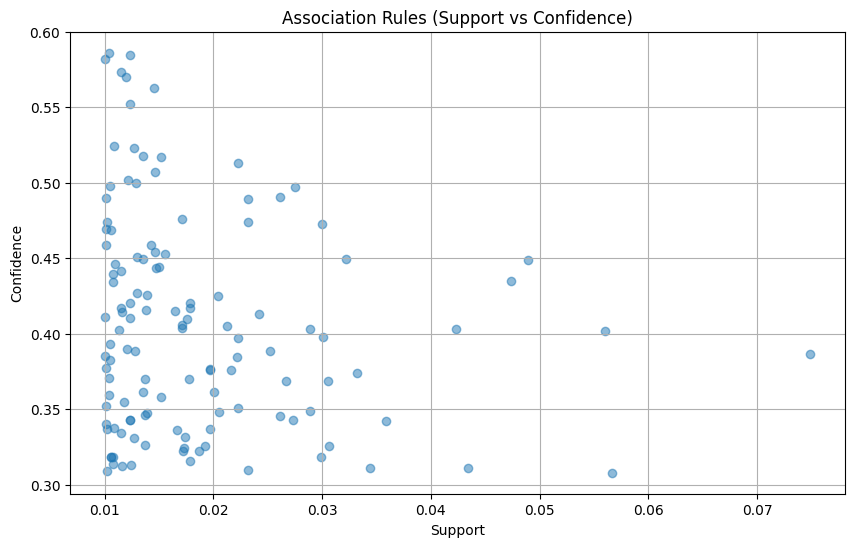

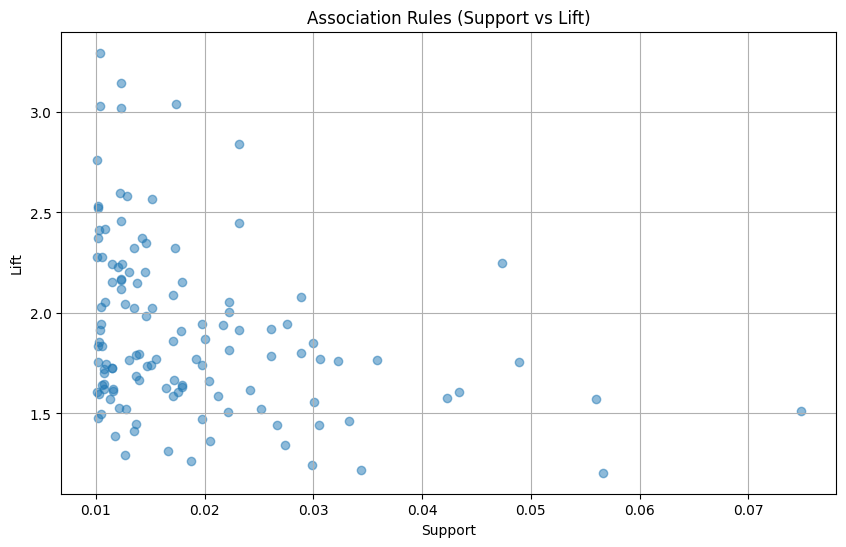

In [9]:
import matplotlib.pyplot as plt

# Create a scatter plot of the association rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules (Support vs Confidence)')
plt.grid(True)
plt.show()

# You can also visualize lift
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Association Rules (Support vs Lift)')
plt.grid(True)
plt.show()